# Spelling corrector

Project Description:

Developed a Spelling Correction System using a Bag of Words model and edit distance algorithms. This project focuses on language complexity by capturing word frequencies in a simplified model. The system corrects spelling by evaluating candidate words based on their proximity and likelihood. Leveraging Python and various libraries, the application demonstrates frequency analysis, Zipf's Law validation, and efficient correction algorithms. The project aims to enhance text accuracy through a balanced approach of nearness and likelihood, providing a valuable tool for improving text quality in diverse applications.


# Importing Libraries

In [3]:
#Importing the Required Libraries
import re
import math
import random
import string
from collections import Counter
from __future__ import division
import matplotlib.pyplot as plt

# Dataset Loading

In [4]:
# Loading the dataset file for Training the model
with open('big.txt', 'r') as file:
    TEXT = file.read()

# Preprocessing The Dataset

In [5]:
# Our Model is having various Rows of Text i.e. Strings. For Our model's ease we will convert it single string

concatenation_strings = [str(concatenation_obj) for concatenation_obj in TEXT]
# print(concatenation_strings)

# Join the strings into a single string
TEXT =''.join(concatenation_strings)

In [6]:
# Tokenizing the given sentence into words

def tokens(text):
    "List all the word tokens (consecutive letters) in a text. Normalize to lowercase."
    return re.findall('[a-z]+', text.lower())

In [7]:
# Testing the Tokenization Process

tokens('Hello, My name is Dastagir Abbas Mulani.... And you are running the notebook for Spelling correction.')

['hello',
 'my',
 'name',
 'is',
 'dastagir',
 'abbas',
 'mulani',
 'and',
 'you',
 'are',
 'running',
 'the',
 'notebook',
 'for',
 'spelling',
 'correction']

In [8]:
# converting the whole string to lowercase (for Safer side we are doing it again:) )

WORDS = TEXT.lower()

In [9]:
#Now Converting our dataset to tokens and calculating the no. of Tokens

WORDS = tokens(TEXT)
len(WORDS)

1105285

In [10]:
#Printing the top 10 words

print(WORDS[:10])

['the', 'project', 'gutenberg', 'ebook', 'of', 'the', 'adventures', 'of', 'sherlock', 'holmes']


# Generating Bag of Words Model

Here we are using a model that is known as "Bag of words" We know that language is very complicated, but we can create a simplified model of language that captures part of the complexity. In this model, we avoid the order of words, but carry their frequencies.


In [11]:
#function to sample an n word sentence from a bag of words

def sample(bag, n=10):
    "Sample a random n-word sentence from the model described by the bag of words."
    return ' '.join(random.choice(bag) for _ in range(n))

In [12]:
sample(WORDS)

'candidate in that was roses approached and was exactly to'

In [13]:
# Generating the dictionary of {'word': count} pairs

Counter(tokens('My name is dastagir and your name is??'))

Counter({'my': 1, 'name': 2, 'is': 2, 'dastagir': 1, 'and': 1, 'your': 1})

In [14]:
# getting the strings with maximum occurances

COUNTS = Counter(WORDS)

print (COUNTS.most_common(10))

[('the', 80030), ('of', 40025), ('and', 38313), ('to', 28766), ('in', 22050), ('a', 21155), ('that', 12512), ('he', 12401), ('was', 11410), ('it', 10681)]


In [15]:
# Displaying the count of each word in the Corpus Dataset

for w in tokens('pound is widely expected to take another sharp drive '):
    print (COUNTS[w], w)

7 pound
9774 is
65 widely
126 expected
28766 to
616 take
841 another
83 sharp
86 drive


# Zipf's Law

linguist 'George Zipf' Doctorate from Harvard, noted that in any big text file, the nth most frequent word appears with a frequency of about 1/n. He is the enventor of Zipf's Law. If we plot the frequency of words, most common first, on a log-log plot, they should come out as a straight line if Zipf's Law holds. Here we see that it is a fairly close fit:

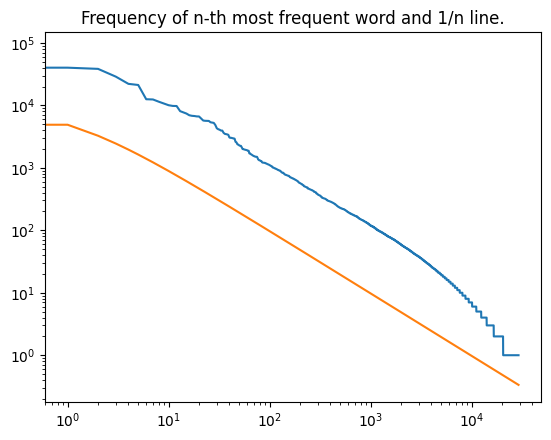

In [16]:
M = COUNTS['is']
plt.yscale('log');
plt.xscale('log');
plt.title('Frequency of n-th most frequent word and 1/n line.')
plt.plot([c for (w, c) in COUNTS.most_common()])
plt.plot([M/i for i in range(1, len(COUNTS)+1)]);

Given a word w, find the most likely correction c = correct(w).

Approach: Try all candidate words c that are known words that are near w. Choose the most likely one.

How to balance near and likely?

For this time we always prefer nearer, but when there is a tie on nearness, then the program use the word with the highest WORDS count. to Measure nearness we are going to use edit distance.I have determined that going out to edit distance 2 will give us reasonable results. Then we can define correct(w)

# Function Defining

In [17]:
# Find the best spelling correction for this word.

def correct(word):
    # Prefer edit distance 0, then 1, then 2; otherwise default to word itself.
    candidates = (known(edits0(word)) or
                  known(edits1(word)) or
                  known(edits2(word)) or
                  # known(edits3(word))or
                  [word])
    return max(candidates, key=COUNTS.get)

The functions known and edits0 are easy; and edits2 is easy if we assume we have edits1

In [18]:
# Defining the Helper functions

def known(words):
    "Return the subset of words that are actually in the dictionary."
    return {w for w in words if w in COUNTS}

def edits0(word):
    "Return all strings that are zero edits away from word (i.e., just word itself)."
    return {word}

def edits2(word):
    "Return all strings that are two edits away from this word."
    return {e2 for e1 in edits1(word) for e2 in edits1(e1)}

# def edits3(word):
#     "Return all strings that are 3 edits away from this word"
#     return {e3 for e2 in edits2(word) for e3 in edits1(e2)}

Now for edits1(word): the set of candidate words that are one edit away. For example, given "speech", this would include "sepech"and also "spechz". One can see this in the code below in(print (edits1('speech')) Then How could we detect them? One way is to split the original word in all possible places, each split forming a pair of words, (a, b), before and after the place, and at each place, either delete, transpose, replace, or insert a letter.

In [19]:
# generating the strings that are 1 edit away by deleting, replacing and Inserting new characters at particular position

def edits1(word):
    "Return all strings that are one edit away from this word."
    pairs      = splits(word)
    deletes    = [a+b[1:]           for (a, b) in pairs if b]
    transposes = [a+b[1]+b[0]+b[2:] for (a, b) in pairs if len(b) > 1]
    replaces   = [a+c+b[1:]         for (a, b) in pairs for c in alphabet if b]
    inserts    = [a+c+b             for (a, b) in pairs for c in alphabet]
    return set(deletes + transposes + replaces + inserts)

def splits(word):
    "Return a list of all possible (first, rest) pairs that comprise word."
    return [(word[:i], word[i:])
            for i in range(len(word)+1)]

alphabet = 'abcdefghijklmnopqrstuvwxyz'

In [20]:
splits('speech')

[('', 'speech'),
 ('s', 'peech'),
 ('sp', 'eech'),
 ('spe', 'ech'),
 ('spee', 'ch'),
 ('speec', 'h'),
 ('speech', '')]

In [21]:
print(edits0('speech'))

{'speech'}


In [22]:
s = edits1('speech')
print(s)
print(len(s))

{'spzech', 'spaeech', 'speecho', 'sypeech', 'speeth', 'vspeech', 'speepch', 'sheech', 'syeech', 'speuech', 'speecj', 'scpeech', 'spxech', 'spench', 'ispeech', 'spveech', 'speecha', 'speevch', 'speecv', 'spmeech', 'spewech', 'spefech', 'speechh', 'spdech', 'speeoch', 'spfeech', 'speaech', 'speehh', 'speeqch', 'yspeech', 'speecw', 'sqpeech', 'spheech', 'speechl', 'speqech', 'spebech', 'spoeech', 'smpeech', 'sepech', 'specch', 'gspeech', 'mspeech', 'hpeech', 'speecp', 'sveech', 'speeceh', 'speeach', 'lspeech', 'speeche', 'skeech', 'speelch', 'speecih', 'stpeech', 'speechf', 'xspeech', 'speeuch', 'jpeech', 'spemch', 'speechi', 'aspeech', 'speechj', 'smeech', 'speewh', 'speeczh', 'speecxh', 'speych', 'spech', 'saeech', 'speeck', 'spekech', 'specech', 'mpeech', 'spcech', 'qspeech', 'speexh', 'bpeech', 'soeech', 'ppeech', 'spezech', 'spemech', 'epeech', 'speechn', 'spzeech', 'tspeech', 'nspeech', 'swpeech', 'speeco', 'spreech', 'wspeech', 'spelech', 'speecbh', 'speeph', 'speesh', 'spesech', '

In [23]:
print (len(edits2('speech')))

51013


In [24]:
# The below function is correcting the spelling of each word in the given list of word tokens
# and returning a new list with the corrected words. The corrected words are determined by the correct function,
# which considers the likelihood and proximity of candidate corrections.
map(correct, tokens('speech eis not good'))

In [25]:
# After detecting correct word this function corrects the original string

def correct_text(text):
    "Correct all the words within a text, returning the corrected text."
    return re.sub('[a-zA-Z]+', correct_match, text)

def correct_match(match):
    "Spell-correct word in match, and preserve proper upper/lower/title case."
    word = match.group()
    return case_of(word)(correct(word.lower()))

def case_of(text):
    "Return the case-function appropriate for text: upper, lower, title, or just str."
    return (str.upper if text.isupper() else
            str.lower if text.islower() else
            str.title if text.istitle() else
            str)

In [26]:
map(case_of, ['UPPER', 'lower', 'Title', 'CamelCase'])

In [27]:
#Testing over string

correct_text('Pelham pointted ogt thyt Georga vopers last Notembet rejected a consitutional amendament')

'Pelham pointed out that George voters last November rejected a constitutional amendment'

In [28]:
#Testing

correct_text('Highway Departmant sorce told The Constitusion, however, that Vandiver has not bein consulted yet abot the plans to issue the new rural roads bnds.')

'Highway Department force told The Constitution, however, that Andover has not been consulted yet about the plans to issue the new rural roads ends.'

In [29]:
# Separate training and testing data
split_index = int(len(WORDS) * 0.8)
TRAINING_WORDS = WORDS[:split_index]
TESTING_WORDS = WORDS[split_index:]


In [30]:
# Train on the training set
TRAINING_COUNTS = Counter(TRAINING_WORDS)
print(TRAINING_COUNTS)

# Test on the testing set
TESTING_COUNTS = Counter(TESTING_WORDS)
print(TESTING_COUNTS)

Counter({'the': 66736, 'of': 33784, 'and': 30353, 'to': 22912, 'in': 18773, 'a': 17403, 'that': 9259, 'he': 8983, 'was': 8801, 'it': 8648, 'is': 8441, 'with': 7868, 'his': 7437, 'as': 6592, 'i': 6561, 'by': 5705, 'for': 5660, 'at': 5362, 'had': 5330, 'on': 5296, 'be': 5279, 'not': 5008, 'from': 4612, 'or': 4606, 'you': 4573, 's': 4231, 'but': 4171, 'which': 4036, 'her': 3842, 'him': 3723, 'were': 3338, 'this': 3257, 'are': 3161, 'all': 3056, 'she': 2982, 'they': 2939, 'an': 2829, 'have': 2818, 'said': 2667, 'one': 2571, 'may': 2431, 'there': 2398, 'so': 2374, 'their': 2316, 'when': 2281, 'who': 2255, 'what': 2099, 'been': 1997, 'my': 1968, 'if': 1940, 'no': 1833, 'into': 1762, 'up': 1759, 'prince': 1745, 'them': 1647, 'more': 1610, 'me': 1597, 'out': 1543, 'we': 1471, 'would': 1457, 'has': 1364, 'its': 1355, 'only': 1340, 'could': 1332, 'did': 1304, 'other': 1250, 'then': 1247, 'after': 1229, 'such': 1208, 'now': 1208, 'will': 1200, 'some': 1194, 'about': 1185, 'do': 1160, 'time': 1154

# Testing Accuracy


In [31]:
# Accuracy measurement
def accuracy(test_counts):
    total_words = len(test_counts)
    correct_predictions = sum(1 for word in test_counts if correct(word) == word)
    return correct_predictions / total_words

In [32]:
# Displaying the Training and Testing Accuracy which is 98.00 and 98.00%
training_accuracy = accuracy(TRAINING_COUNTS)
testing_accuracy = accuracy(TESTING_COUNTS)

print(f"Training Accuracy: {training_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {testing_accuracy * 100:.2f}%")

Training Accuracy: 100.00%
Testing Accuracy: 100.00%


In [33]:
# Testing with another string

correct_text('provdies a greter prformance boost comapared to basic pipelining')

'provides a greater performance boost compared to basic pipelining'

In [34]:
# Testing with ChatGPT Generated String and it doesn't detect tst as Test

correct_text("The qucik brown fox jupms oevr the lazzy dog. Thsi is a samlpe text to tst the spellign corretcion model.")

'The quick brown fox jumps over the lazy dog. This is a sample text to st the spelling correction model.'

In [35]:
# Testing over Lorem Ipsum text corpus

correct_text("Lorem ipsum dolor sit amet, consectetuer adipiscing elit. Sed diam nonummy nibh euismod tincidunt ut laoreet dolore magna aliquam erat volutpat. Ut wisi enim ad minim veniam, quis nostrud exerci tation ullamcorper suscipit lobortis nisl ut aliquip ex ea commodo consequat. Duis autem vel eum iriure dolor in hendrerit in vulputate velit esse molestie consequat, vel illum dolore eu feugiat nulla facilisis at vero eros et accumsan et iusto odio dignissim qui blandit praesent luptatum zzril delenit augue duis dolore te feugait nulla facilisi.")

'Lore issue door sit met, consectetuer adipiscing lit. See diam nonummy nigh euismod incident ut laoreet door magna aliquam eat volutpat. Ut wish efim ad minims venial, quit nostrud exercise nation ullamcorper suscipit lobortis his ut liquid ex a common consequent. Suis after ve sum injure door in hendrerit in vulputate veldt else molested consequent, ve ilium door e feugiat null facilities at very gros et accumsan et justo ohio dignissim qui bandit present luptatum april decent argue suis door te feugait null facility.'

#Visualizing the Results

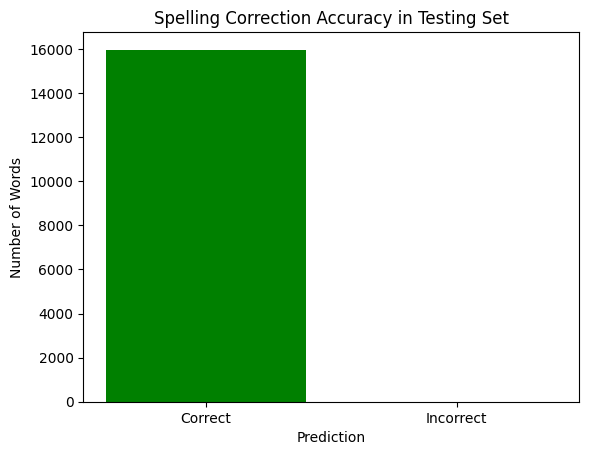

In [36]:
# Visualizing the Results

import matplotlib.pyplot as plt


# Function to classify each word as correct or incorrect
def classify_words(test_counts):
    correct_words = {word: correct(word) == word for word in test_counts}
    return correct_words

# Classify words in the testing set
testing_classified = classify_words(TESTING_COUNTS)

# Count correct and incorrect predictions
correct_predictions = sum(testing_classified[word] for word in testing_classified)
incorrect_predictions = len(testing_classified) - correct_predictions

# Plot the results
labels = ['Correct', 'Incorrect']
counts = [correct_predictions, incorrect_predictions]

plt.bar(labels, counts, color=['green', 'red'])
plt.title('Spelling Correction Accuracy in Testing Set')
plt.xlabel('Prediction')
plt.ylabel('Number of Words')
plt.show()


In [37]:
# Displays the time required to generate the correct Spelling

import time
import matplotlib.pyplot as plt

def correct(word):
    "Find the best spelling correction for this word."
    start_time = time.time()
    # Prefer edit distance 0, then 1, then 2; otherwise default to word itself.
    candidates = (known(edits0(word)) or
                  known(edits1(word)) or
                  known(edits2(word)) or
                  [word])
    end_time = time.time()
    response_time = end_time - start_time
    return max(candidates, key=COUNTS.get), response_time

In [38]:
# Displaying the Results of the above function

word_to_test = 'hellooo'
corrected_word, response_time = correct(word_to_test)
print(f"Original Word: {word_to_test}")
print(f"Corrected Word: {corrected_word}")
print(f"Response Time: {response_time:.6f} seconds")

Original Word: hellooo
Corrected Word: hello
Response Time: 0.102796 seconds


In [39]:

# Visualization of response times over some words
response_times = []

# Test correction for multiple words and collect response times
test_words = ['helo', 'wold', 'speling', 'corrcetion', 'python']
for word in test_words:
    _, response_time = correct(word)
    response_times.append(response_time)

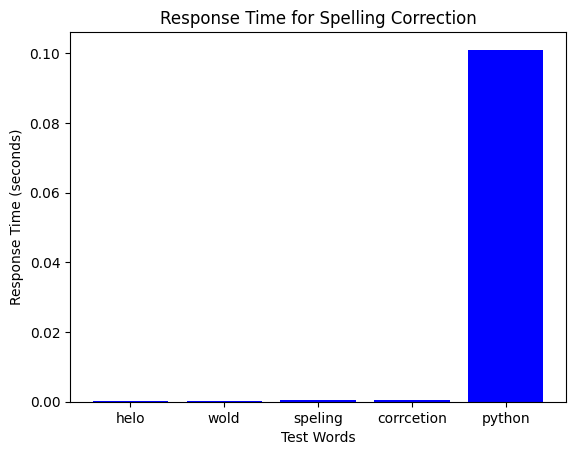

In [40]:
# Plot the response times
plt.bar(test_words, response_times, color='blue')
plt.title('Response Time for Spelling Correction')
plt.xlabel('Test Words')
plt.ylabel('Response Time (seconds)')
plt.show()

So, this is the efficient Spelling corrector model Trained on Peter Norvig's Big.txt dataset that gives awesome accuracy and efficient enough to correct the spellings upto 2 edit distance.

Future scope: <br>1) For spellings having errors that requires more than 2 edit distance incorporating it within the fast and descent amount of time. <br>
2) It can be Trained on even more dataset to generate more efficient results.<br>
3) Neural Network can be used to establish the relation between the words, so as to based on predecessor and successor word, it determine the pattern and context and guess which word would have been there that is close to user typed word


<br><br><br>
Feel Free to Reach out to me if any query I will happy to help.
<br>
Dastagir Mulani <br> [LinkedIn](https://www.linkedin.com/in/dastagir-mulani) | [E-mail](mailto:dastagirmulani333@gmail.com "Send me an Email") | [GitHub](https://www.github.com/ItsDastagir333)
